Agent position: (7, 1)
Target position: (10, 14)
Target raggiunto in generazione 0
Target raggiunto in generazione 151
Target raggiunto in generazione 171
Target raggiunto in generazione 394
Target raggiunto in generazione 357
Success rate: 100.0%
Average execution time: 3.30 seconds
Average path length: 25.40
Average generations needed: 214.60
The best path is long 21.00 and is [(7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (6, 6), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 12), (7, 12), (7, 13), (8, 13), (8, 14), (9, 14), (10, 14)]
Agent position: (8, 1)
Target position: (7, 14)
Target raggiunto in generazione 1981
Target not reached after all generations.
Target not reached after all generations.
Target not reached after all generations.
Target raggiunto in generazione 1150
Success rate: 40.0%
Average execution time: 46.11 seconds
Average path length: 43.00
Average generations needed: 1565.50
The best path is long 43.00 and is [(8, 1), (9, 1), (10, 1), (11, 1),

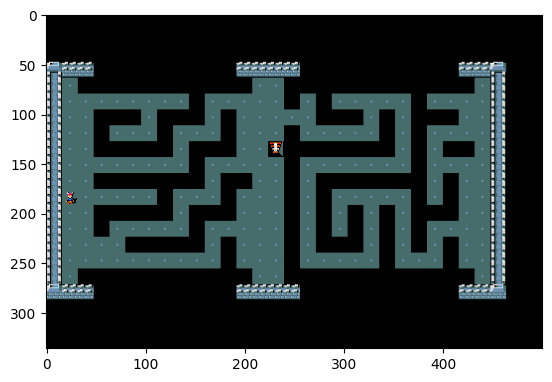

In [36]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from utils import *
from genetic_new import *

#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
for i in range(11,21):
    SEED = i
    env.seed(SEED)
    state = env.reset()

    coordinates = [500, 500]

    game_map = state['chars']
    game = state['pixel']
    game_stats = state['blstats']
    game_mex = state['message']

    plt.imshow(state['pixel'][:coordinates[0], :coordinates[1]])

    #game_map = np.array(game_map)

    start = get_player_location(game_map)
    target = get_target_location(game_map)
    hp = game_stats[6]
    print("Agent position:", start)
    print("Target position:", target)


    # Add Game Over function
    def display_game_over():
        plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
                fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

    # Add ictory function
    def display_victory():
        plt.text(0.5, 0.5, "Victory: You reached the target!", 
                fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)
        

    # Modify your existing code to use this function:
    list_paths = []
    input_params = {
        "population_size": 1000,
        "generations": 2000,
        "mutation_rate": 0.9,
        "max_steps": abs(target[0] - start[0]) + abs(target[1] - start[1]) * 3,
        "num_iterations": 5
    }

    avg_metrics = run_multiple_evaluations(game_map, start, target, 
                                        population_size=input_params["population_size"], 
                                        generations=input_params["generations"], 
                                        mutation_rate=input_params["mutation_rate"], 
                                        max_steps=input_params["max_steps"], 
                                        num_iterations=input_params["num_iterations"])

    # Save metrics to CSV
    save_metrics_to_csv(SEED, game_map, start, target, input_params, avg_metrics)

    # Your existing print statements
    print(f"Success rate: {avg_metrics['success_rate']}%")
    if avg_metrics['successful_runs'] > 0:
        print(f"Average execution time: {avg_metrics['avg_execution_time']:.2f} seconds")
        print(f"Average path length: {avg_metrics['avg_final_path_length']:.2f}")
        print(f"Average generations needed: {avg_metrics['avg_generations_needed']:.2f}")
        print(f"The best path is long {avg_metrics['best_path_length']:.2f} and is {avg_metrics['best_path']}")
        list_paths.append(avg_metrics['best_path'])
    else:
        print("No successful runs were found.")
        print("Try adjusting the parameters (population_size, generations, mutation_rate, max_steps)")


In [24]:
# Modify your existing code to use this function:
list_paths = []
input_params = {
    "population_size": 1000,
    "generations": 2000,
    "mutation_rate": 0.9,
    "max_steps": abs(target[0] - start[0]) + abs(target[1] - start[1]) * 3,
    "num_iterations": 5
}

avg_metrics = run_multiple_evaluations(game_map, start, target, 
                                     population_size=input_params["population_size"], 
                                     generations=input_params["generations"], 
                                     mutation_rate=input_params["mutation_rate"], 
                                     max_steps=input_params["max_steps"], 
                                     num_iterations=input_params["num_iterations"])

# Save metrics to CSV
save_metrics_to_csv(SEED, game_map, start, target, input_params, avg_metrics)

# Your existing print statements
print(f"Success rate: {avg_metrics['success_rate']}%")
if avg_metrics['successful_runs'] > 0:
    print(f"Average execution time: {avg_metrics['avg_execution_time']:.2f} seconds")
    print(f"Average path length: {avg_metrics['avg_final_path_length']:.2f}")
    print(f"Average generations needed: {avg_metrics['avg_generations_needed']:.2f}")
    print(f"The best path is long {avg_metrics['best_path_length']:.2f} and is {avg_metrics['best_path']}")
    list_paths.append(avg_metrics['best_path'])
else:
    print("No successful runs were found.")
    print("Try adjusting the parameters (population_size, generations, mutation_rate, max_steps)")

Target raggiunto in generazione 701
Target raggiunto in generazione 690
Target raggiunto in generazione 1192
Target raggiunto in generazione 607
Target raggiunto in generazione 589
Success rate: 100.0%
Average execution time: 15.66 seconds
Average path length: 31.00
Average generations needed: 755.80
The best path is long 29.00 and is [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (14, 2), (15, 2), (15, 3), (15, 4), (15, 5), (15, 6), (15, 7), (15, 8), (14, 8), (13, 8), (13, 9), (13, 10), (13, 11), (13, 12), (12, 12), (11, 12), (10, 12), (10, 13), (10, 14), (9, 14), (8, 14), (7, 14)]


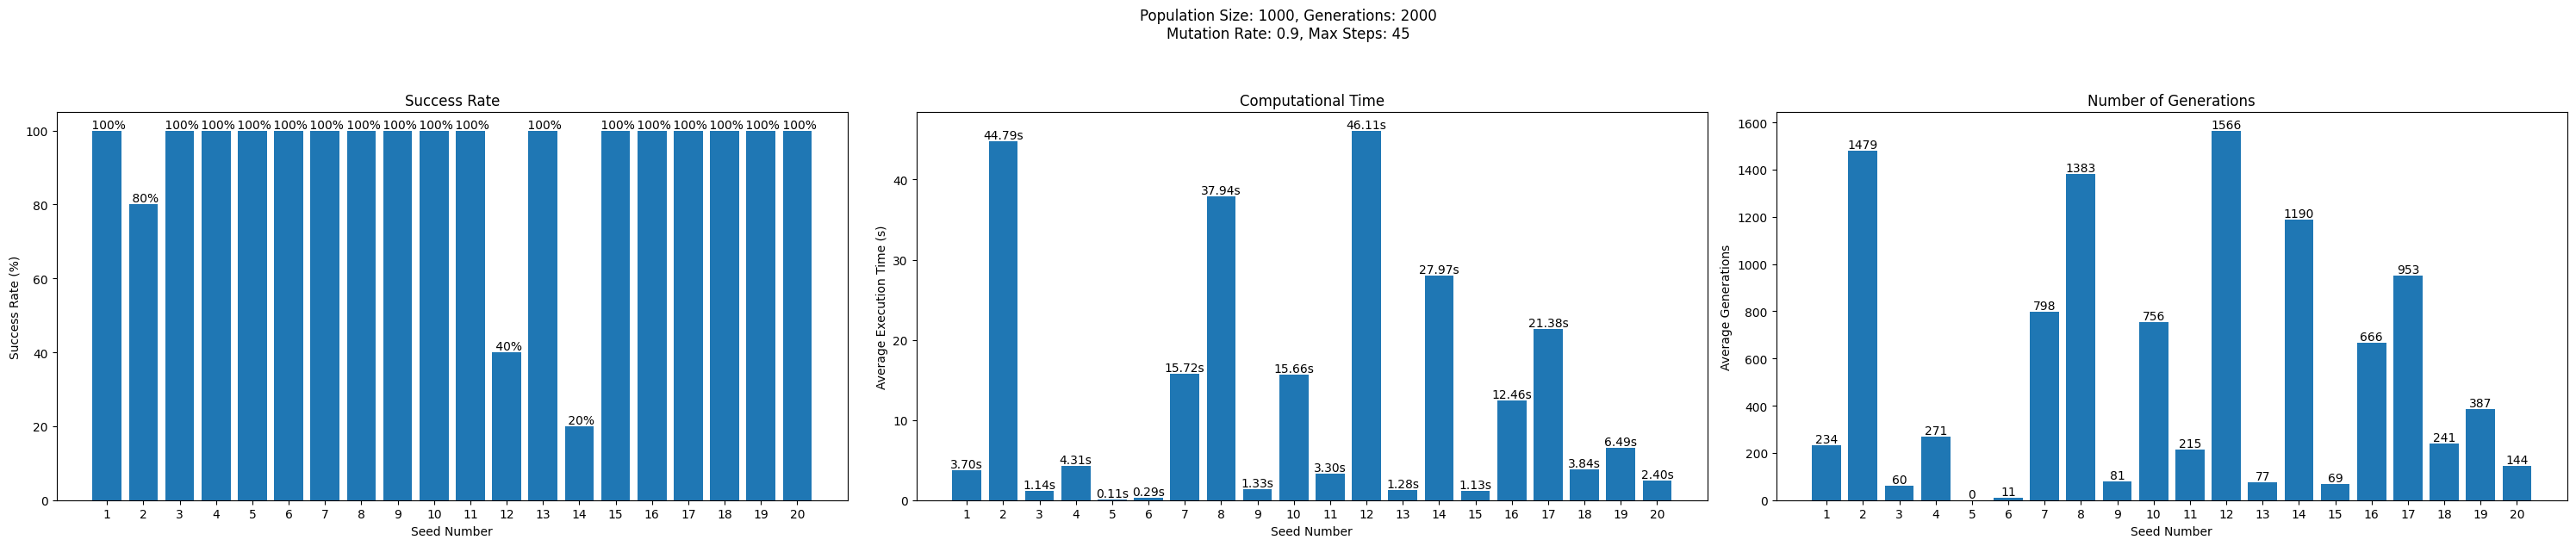

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("genetic_algorithm_results.csv")

# Get the common parameters (taking first row since these are constant across seeds)
pop_size = df['population_size'].iloc[0]
generations = df['generations'].iloc[0]
mutation_rate = df['mutation_rate'].iloc[0]
max_steps = df['max_steps'].iloc[0]

# Create the parameter string for the title
params_title = f'Population Size: {pop_size}, Generations: {generations}\nMutation Rate: {mutation_rate}, Max Steps: {max_steps}'
bar_width = 0.8

# Create figure with three subplots
plt.figure(figsize=(30, 6))

# Add the main title with parameters
plt.suptitle(params_title, fontsize=12, y=1.05)

# Success Rate Bar Graph
plt.subplot(1, 3, 1)
success_bars = plt.bar(range(len(df)), df['success_rate'], width=bar_width)
plt.xlabel('Seed Number')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate')
plt.xticks(range(len(df)), [f'{i+1}' for i in range(len(df))])

# Add value labels on top of each bar
for bar in success_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height: .0f}%',
             ha='center', va='bottom')

# Computational Time Bar Graph
plt.subplot(1, 3, 2)
time_bars = plt.bar(range(len(df)), df['avg_execution_time'], width=bar_width)
plt.xlabel('Seed Number')
plt.ylabel('Average Execution Time (s)')
plt.title('Computational Time')
plt.xticks(range(len(df)), [f'{i+1}' for i in range(len(df))])

# Add value labels on top of each bar
for bar in time_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}s',
             ha='center', va='bottom')

# Generations Bar Graph
plt.subplot(1, 3, 3)
gen_bars = plt.bar(range(len(df)), df['avg_generations_needed'], width=bar_width)
plt.xlabel('Seed Number')
plt.ylabel('Average Generations')
plt.title('Number of Generations')
plt.xticks(range(len(df)), [f'{i+1}' for i in range(len(df))])

# Add value labels on top of each bar
for bar in gen_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('genetic_algorithm_performance_1.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
population_size = 1000 #number of possible created path in our dictionary
generations = 2000
mutation_rate = 0.9 #probability of mutation from one path to another
max_steps = abs(target[0] - start[0]) + abs(target[1] - start[1]) * 3
print(max_steps)

list_paths, genetic_metrics = evaluate_genetic_algorithm(game_map, start, target, population_size, generations, mutation_rate, max_steps)
print("Genetic Algorithm Metrics:")
for key, value in genetic_metrics.items():
    print(f"    {key}: {value}")

In [33]:
for idx, path in enumerate(list_paths):
   print(f"Path {idx + 1}: {path}")

Path 1: [(11, 1), (11, 2), (10, 2), (9, 2), (8, 2), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (6, 8), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14)]


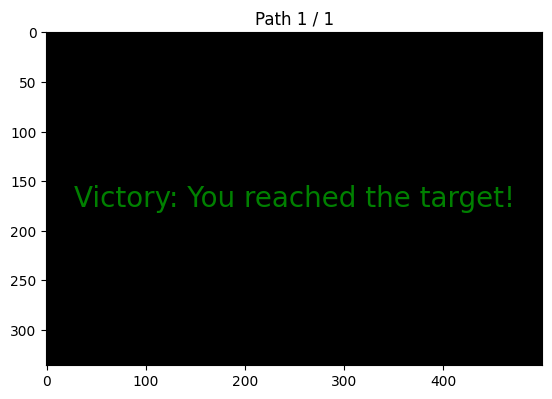

In [47]:
# Iterate over each path in list_paths
for idx, path in enumerate(list_paths):  # 'idx' will be the index (starting from 0)
    try:
        # Set the title to indicate the path number
        plt.title(f"Path {idx + 1} / {len(list_paths)}")  # Index starts from 0, so we add 1 to make it human-readable

        # Reset dell'ambiente per ogni nuovo percorso
        env.seed(SEED)
        state = env.reset()  # Reset dell'ambiente
        game_map = state['chars']
        game = state['pixel']
        game_stats = state['blstats']
        game_mex = state['message']
        
        # Posiziona il giocatore allo start ogni volta
        player_location = get_player_location(game_map)
        target_location = get_target_location(game_map)

        # Convert the path to actions (if necessary)
        actions = actions_from_path(start, path[1:])

        # Visualize the current path
        image = plt.imshow(game[:coordinates[0], :coordinates[1]])
        for action in actions:
            s, _, done, _ = env.step(action)  # `done` tells us if the simulation is over
            image.set_data(s['pixel'][:coordinates[0], :coordinates[1]])

            # If the simulation is over
            if done:
                # Check if the player is dead
                if hp == 0:
                    display_game_over()
                else:
                    display_victory()
                break  # Stop the simulation for the current path

            # Update the game visualization
            display.display(plt.gcf())
            display.clear_output(wait=True)
    except Exception as e:
        continue